In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("dataset/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv")
dataset

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv'

In [ ]:
dataset["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
print(dataset["CAEC"].unique())
print(dataset["CALC"].unique())
print(dataset["MTRANS"].unique())


['Sometimes' 'Frequently' 'Always' 'no']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [ ]:
x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

print(x)
print()
print(y)

[['Female' 21.0 1.62 ... 1.0 'no' 'Public_Transportation']
 ['Female' 21.0 1.52 ... 0.0 'Sometimes' 'Public_Transportation']
 ['Male' 23.0 1.8 ... 1.0 'Frequently' 'Public_Transportation']
 ...
 ['Female' 22.524036 1.752206 ... 0.646288 'Sometimes'
  'Public_Transportation']
 ['Female' 24.361936 1.73945 ... 0.586035 'Sometimes'
  'Public_Transportation']
 ['Female' 23.664709 1.738836 ... 0.714137 'Sometimes'
  'Public_Transportation']]

['Normal_Weight' 'Normal_Weight' 'Normal_Weight' ... 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_III']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
x[:,4] = label.fit_transform(x[:,4]) # label encoding for family history with over weight 
x[:,5] = label.fit_transform(x[:,5]) # label encoding for FAVC
x[:,0] = label.fit_transform(x[:,0]) # label encoding for gender
x[:,8] = label.fit_transform(x[:,8]) # label encoding for CAEC
x[:,9] = label.fit_transform(x[:,9]) # label encoding for smoking
x[:,11] = label.fit_transform(x[:,11]) # label encoding for SCC
x[:,14] = label.fit_transform(x[:,14]) # label encoding for CALC 
x[:,15] = label.fit_transform(x[:,15]) # label encoding for MTRANS 

print(x)

[[0 21.0 1.62 ... 1.0 3 3]
 [0 21.0 1.52 ... 0.0 2 3]
 [1 23.0 1.8 ... 1.0 1 3]
 ...
 [0 22.524036 1.752206 ... 0.646288 2 3]
 [0 24.361936 1.73945 ... 0.586035 2 3]
 [0 23.664709 1.738836 ... 0.714137 2 3]]


In [ ]:
print(x[0:3,:])

[[0 21.0 1.62 64.0 1 0 2.0 3.0 2 0 2.0 0 0.0 1.0 3 3]
 [0 21.0 1.52 56.0 1 0 3.0 3.0 2 1 3.0 1 3.0 0.0 2 3]
 [1 23.0 1.8 77.0 1 0 2.0 3.0 2 0 2.0 0 2.0 1.0 1 3]]


In [ ]:
y = label.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size= 0.2,random_state = 0)

In [ ]:
from xgboost import XGBClassifier

classifierXG = XGBClassifier()
classifierXG.fit(xTrain, yTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
yPredictXG = classifierXG.predict([xTest[0]])
print(yPredictXG)

[3]


In [ ]:
from sklearn.metrics import precision_score, recall_score,r2_score,f1_score

precisionXG = precision_score(yTest,yPredictXG, average="weighted")
recallXG = recall_score(yTest,yPredictXG,average="weighted")
f1ScoreXG = f1_score(yTest,yPredictXG,average="weighted")


print("precision: ",precisionXG)
print("recall: ",recallXG)
print("f1_score: ",f1ScoreXG)

precision:  0.9883797985008538
recall:  0.9881796690307328
f1_score:  0.9881852229464801


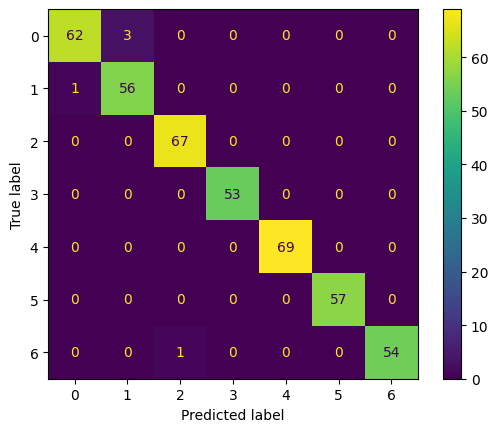

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm1 = confusion_matrix(yTest,yPredictXG)

disp = ConfusionMatrixDisplay(confusion_matrix= cm1)
disp.plot()
plt.show()

In [ ]:
import pickle

fileName = "model.pkl"
with open(fileName, 'wb') as files:
    pickle.dump(classifierXG,files)

In [ ]:
len(xTest[0])

16